In [1]:
%pip install selectivesearch
%pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

OpenCV successfully read the image.
Image shape: (192, 204, 3)


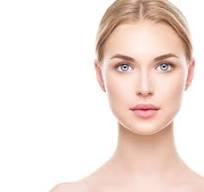

In [24]:
import cv2

img = cv2.imread('download.jpeg')

if img is None:
  print("OpenCV could not read the image.")
else:
  print("OpenCV successfully read the image.")
  print(f"Image shape: {img.shape}")
  # Optionally display the image
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)

In [25]:
segments_fz = felzenszwalb(img, scale=200)

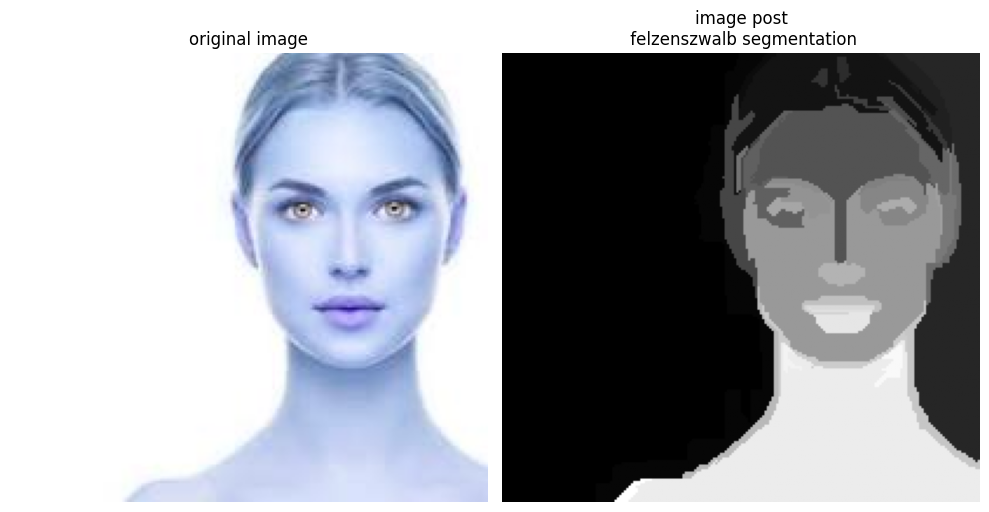

In [26]:
subplots([img, segments_fz], titles=['original image', 'image post\n felzenszwalb segmentation'], figsize=(10,10), nc=2)

In [27]:
def extract_candidates(img):
  img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
  img_area = np.prod(img.shape[:2])
  candidates = []
  for r in regions:
    if r['rect'] in candidates: continue
    if r['size'] < (0.05*img_area): continue
    if r['size'] > (1*img_area): continue
    x, y, w, h = r['rect']
    candidates.append(list(r['rect']))
  return candidates

/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


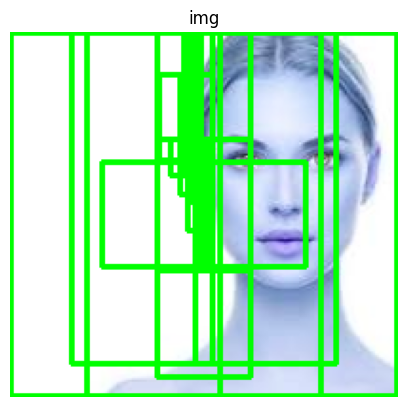

In [28]:
candidates = extract_candidates(img)
show(img, bbs = candidates)

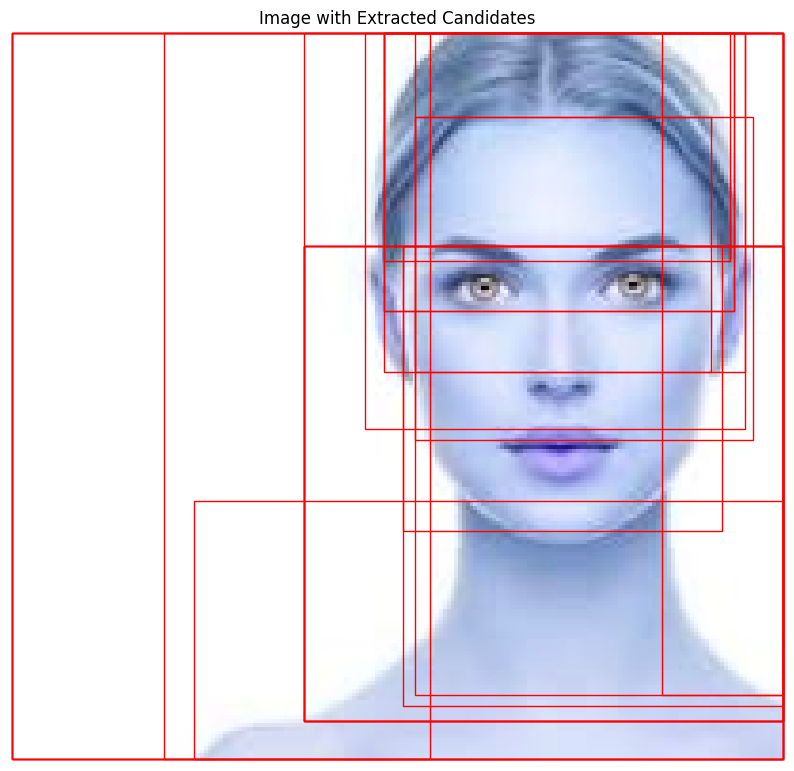

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)

# Add bounding boxes
for x, y, w, h in candidates:
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.set_title('Image with Extracted Candidates')
ax.axis('off')

plt.show()

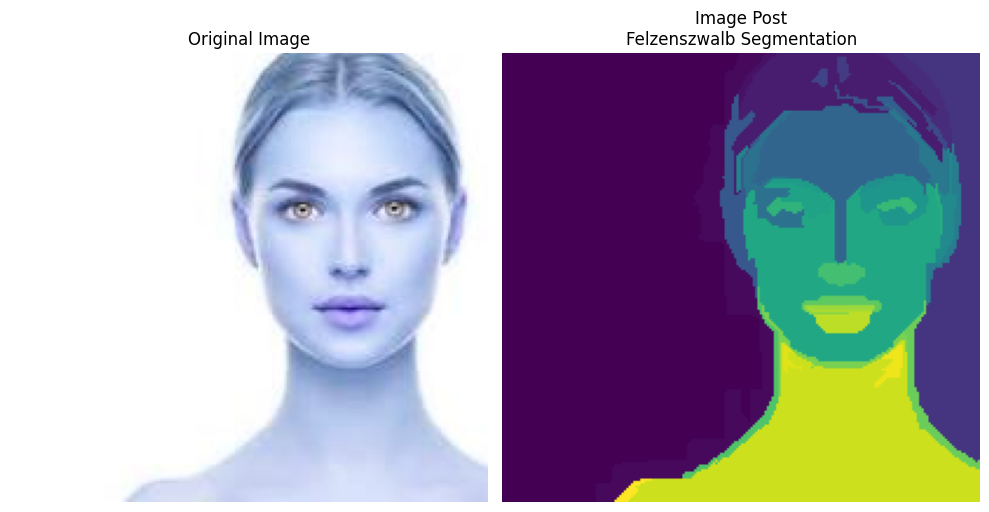

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segments_fz)
axes[1].set_title('Image Post\nFelzenszwalb Segmentation')
axes[1].axis('off')

plt.tight_layout()
plt.show()